In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Загрузим датасет
df = pd.read_csv('C:/Users/nickk/OneDrive/Desktop/TPU/ProgrammingPython/Kursach/diabetes_binary_health_indicators_BRFSS2015.csv', sep=",")

# Проведем первичное исследование
print(df.shape) # Return a tuple representing the dimensionality of the DataFrame.


(253680, 22)


# 1. Проверим исходные данные на корректность форматов данных.

In [9]:
# 1.1 Информация о типах данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes              253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [23]:
# 1.2 Проверим на пропуски
print(df.isnull().sum()) # Показывает сколько значений отсутсвует в каждом столбце

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [25]:
# Проверим на дубликаты
df.duplicated().sum()  # checking for duplicates 

np.int64(24206)

In [26]:
df.drop_duplicates(inplace=True) #
df.shape

(229474, 22)

In [27]:
# метод возвращает относительные частоты (доли) каждого уникального значения вместо абсолютных частот
df.Diabetes.value_counts(normalize=True) 

Diabetes
0.0    0.847055
1.0    0.152945
Name: proportion, dtype: float64

In [20]:
# 1.3 Составим описательную статистику DataFrame
df.describe().transpose() # для числовых данных

,count,mean,std,min,25%,50%,75%,max
Diabetes,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


# bmi ,mentalhealth,physical health are deviating the most from mean
newfeature = ((data["MentHlth"]) + (data["PhysHlth"])) * (data["BMI"]):
создаем новую переменную newfeature,
Это может быть полезно для создания нового показателя, который учитывает как физическое, так и психическое здоровье, умноженное на индекс массы тела. Это может дать представление о том, как физическое и психическое здоровье в совокупности влияют на индекс массы тела или наоборот.
Создание DataFrame:

newfeature = pd.DataFrame(newfeature):
Здесь мы преобразуем newfeature в DataFrame. Это может быть полезно, если вы хотите сохранить структуру данных и использовать функции pandas для дальнейшего анализа.
Подсчет уникальных значений:

newfeature.value_counts():
Эта функция подсчитывает количество уникальных значений в созданном DataFrame newfeature. Это позволяет вам увидеть, сколько раз каждая комбинация значений появляется в вашем новом показателе.
Например, если вы хотите понять, сколько людей имеют одинаковую комбинацию психического и физического здоровья, умноженную на их индекс массы тела, вы можете использовать value_counts() для получения этой информации.
Возможное применение:
Анализ здоровья: Этот новый показатель может использоваться для анализа взаимосвязи между психическим и физическим здоровьем и индексом массы тела. Например, вы можете исследовать, как различные уровни психического и физического здоровья влияют на индекс массы тела.

Моделирование: Если вы планируете использовать эти данные для построения модели (например, регрессионной модели), создание нового показателя может помочь выявить более сложные взаимосвязи между переменными.

Визуализация: Вы можете использовать результаты value_counts() для создания графиков и визуализаций, чтобы лучше понять распределение нового показателя в вашей выборке.

данный код создает новый показатель, который может быть полезен для дальнейшего анализа и понимания взаимосвязей между переменными в вашем наборе данных.

0     
0.0       125985
54.0        1739
52.0        1423
48.0        1351
60.0        1329
           ...  
4450.0         1
4500.0         1
469.0          1
3135.0         1
3136.0         1
Name: count, Length: 1142, dtype: int64


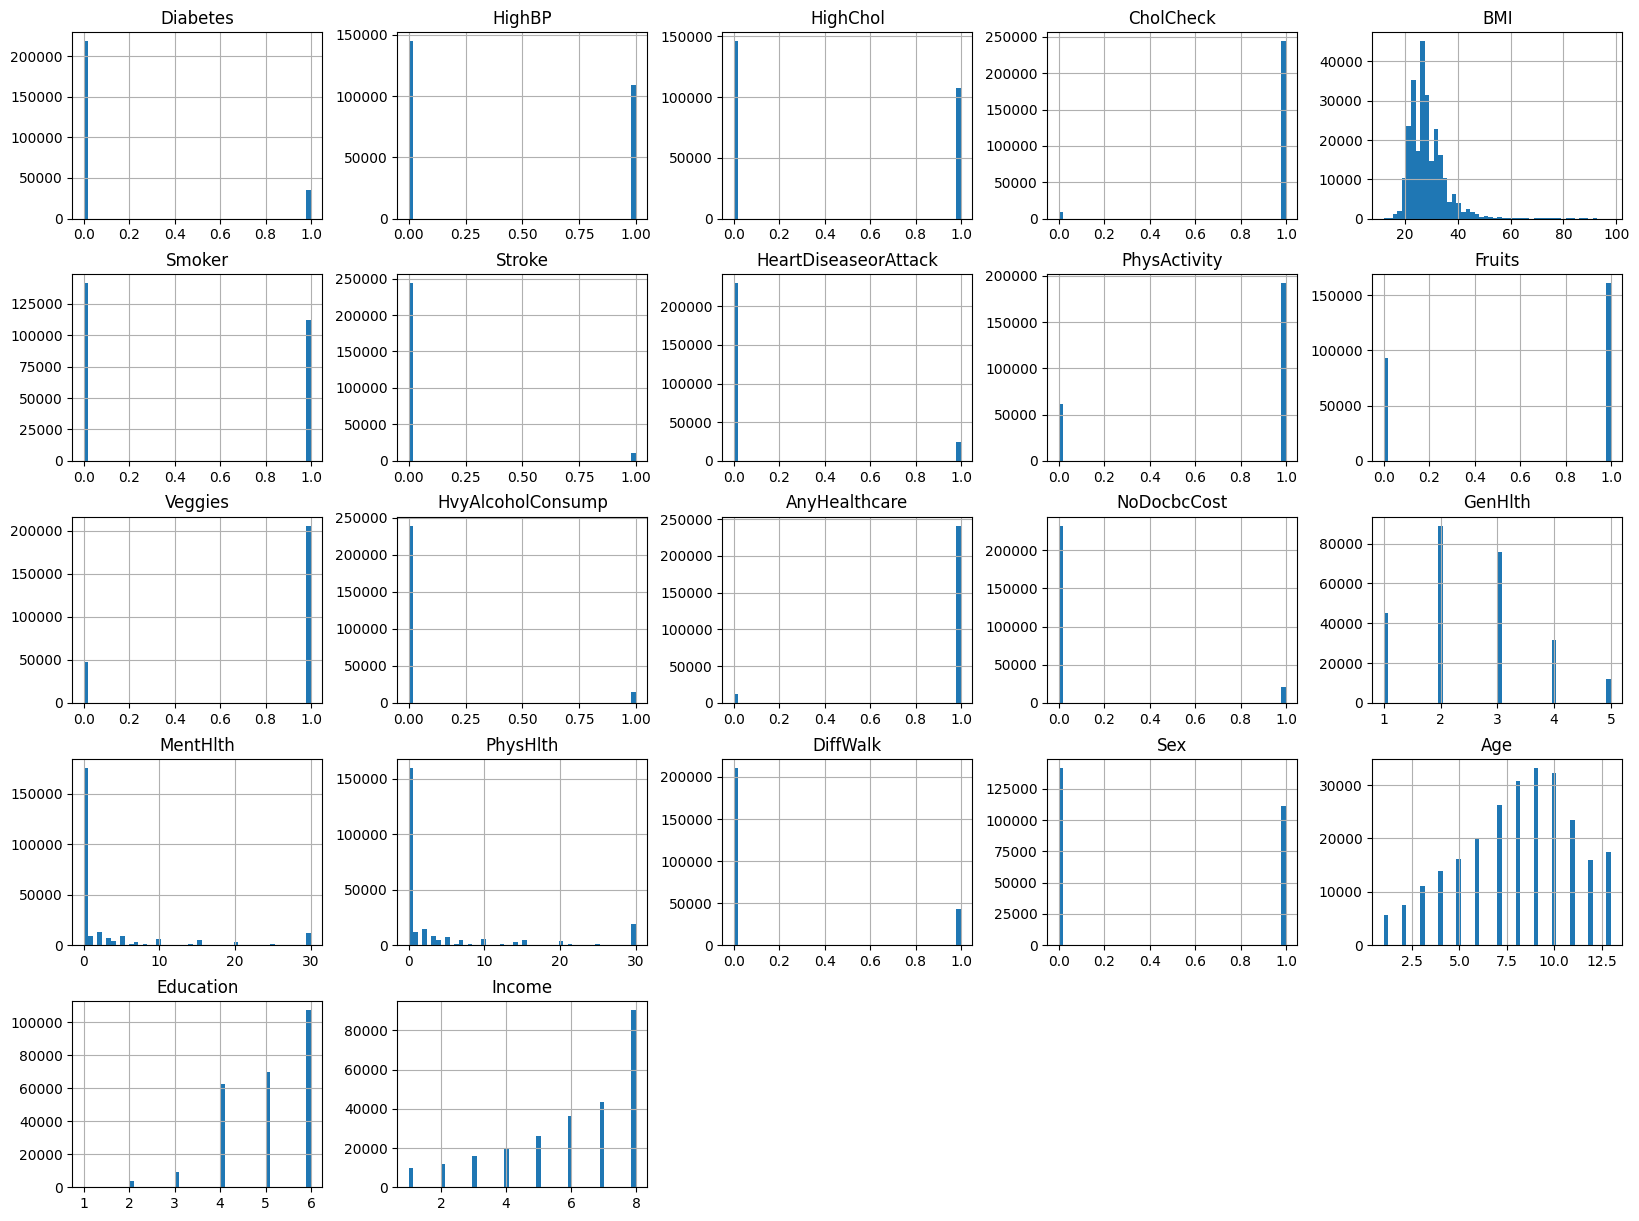

In [21]:
newfeature=((df["MentHlth"])+(df["PhysHlth"]))*(df["BMI"])
newfeature=pd.DataFrame(newfeature)
print(newfeature.value_counts())
#y=df["Diabetes_binary"]
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

# Чтобы получить наиболее точную модель и не перегружать её ненужной информацией, мы хотим оставить только наиболее значимые признаки.  Целевым признаком в нашем случае является столбец «Diabetes». По этой же причине для наиболее значимых признаков мы проверим наличие выбросов и удалим их.

In [30]:
# Seeking for Feature Engineering and Correlations checking
#list of top features that have high correlation between features and target
features = df.corr()['Diabetes'].sort_values()
print(features)

Income                 -0.140659
Education              -0.102686
PhysActivity           -0.100404
HvyAlcoholConsump      -0.065950
Veggies                -0.041734
Fruits                 -0.024805
NoDocbcCost             0.020048
AnyHealthcare           0.025331
Sex                     0.032724
Smoker                  0.045504
MentHlth                0.054153
CholCheck               0.072523
Stroke                  0.099193
PhysHlth                0.156211
HeartDiseaseorAttack    0.168213
Age                     0.177263
HighChol                0.194944
BMI                     0.205086
DiffWalk                0.205302
HighBP                  0.254318
GenHlth                 0.276940
Diabetes                1.000000
Name: Diabetes, dtype: float64


In [31]:
# выберем те признаки, которые имеют корреляцию с целевым признаком Diabetes, >= 0,24.
high_corr_features = features[features >= 0.024].index
print(high_corr_features)

Index(['AnyHealthcare', 'Sex', 'Smoker', 'MentHlth', 'CholCheck', 'Stroke',
       'PhysHlth', 'HeartDiseaseorAttack', 'Age', 'HighChol', 'BMI',
       'DiffWalk', 'HighBP', 'GenHlth', 'Diabetes'],
      dtype='object')


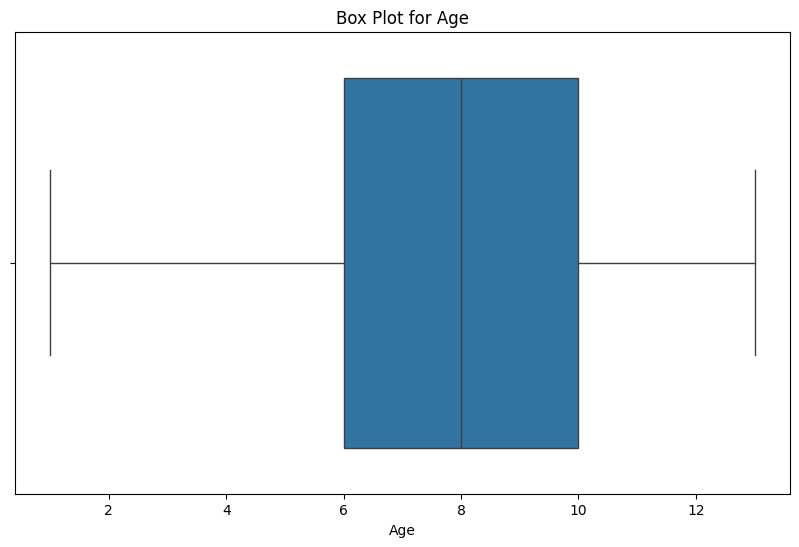

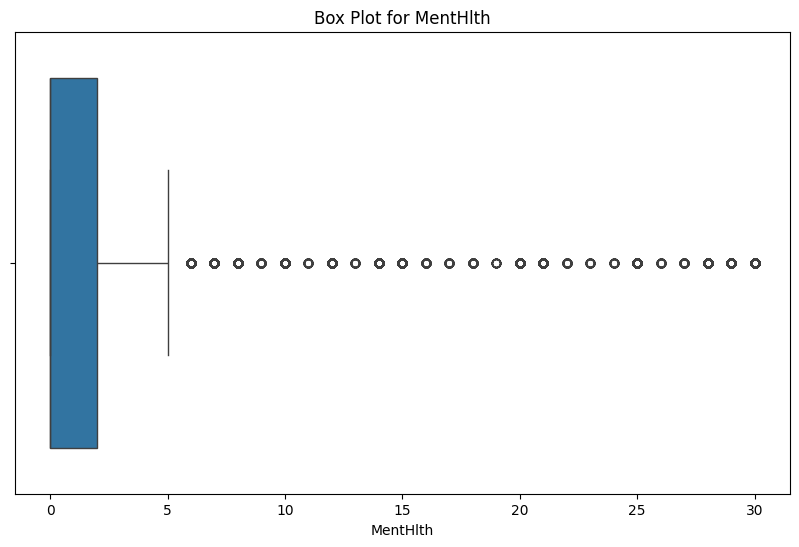

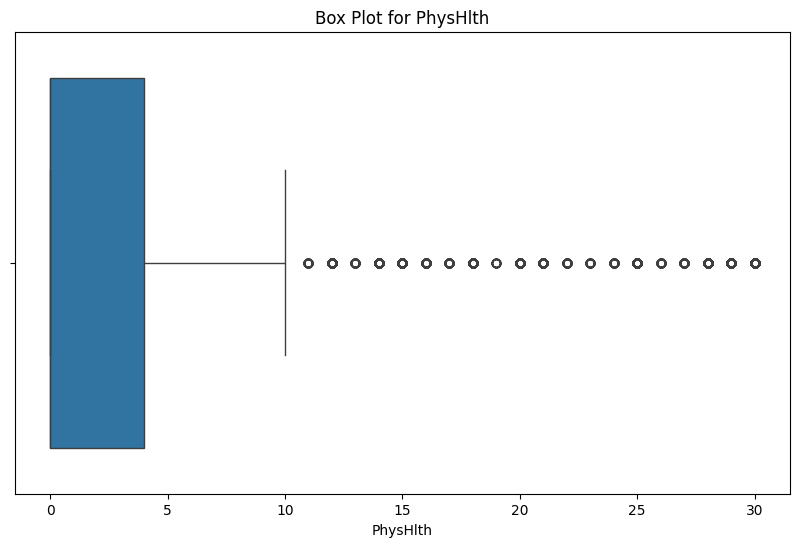

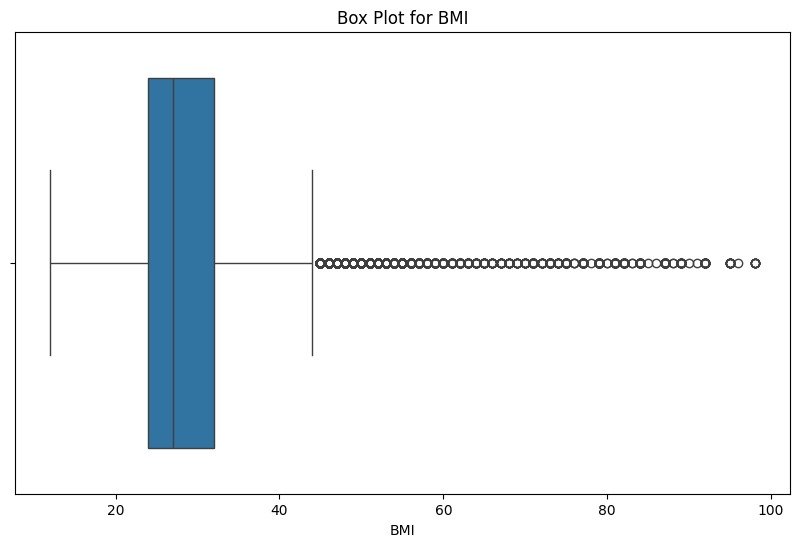

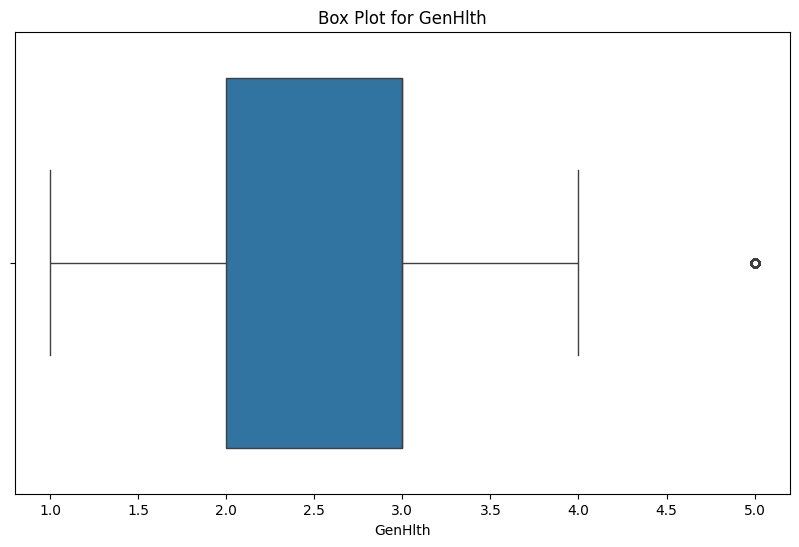

In [35]:
# Визуализируем high_corr_features, чтобы увидеть, есть ли у нас выбросы, по тем признакам, где у нас есть
# данные в диапазоне:

for column in ['Age','MentHlth','PhysHlth', 'BMI', 'GenHlth']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [ ]:
# Исследуем выбросы (IQR)

In [ ]:
Dealing with outliers - IQR (The interquartile range)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from tabulate import tabulate

# Загрузим датасет
df = pd.read_csv('C:/Users/nickk/OneDrive/Desktop/TPU/ProgrammingPython/Kursach/diabetes_binary_health_indicators_BRFSS2015.csv', sep=",")
# Просмотр первых нескольких строк датасета
# print(df.head())

# Определение бинарных признаков (например, если они имеют только два уникальных значения)
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

# Выбор только числовых признаков, исключая бинарные
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
non_binary_numeric_columns = [col for col in numeric_columns if col not in binary_columns]

# Вычисление Q1 и Q3 для не бинарных числовых признаков
Q1 = df[non_binary_numeric_columns].quantile(0.25)
Q3 = df[non_binary_numeric_columns].quantile(0.75)

# Вычисление IQR
IQR = Q3 - Q1

# Создание таблицы
table = PrettyTable()
table.field_names = ["Признак", "Q1", "Q3", "IQR"]

for col in non_binary_numeric_columns:
    table.add_row([col, Q1[col], Q3[col], IQR[col]])

# Печать таблицы
print(table)

+-----------+------+------+-----+
|  Признак  |  Q1  |  Q3  | IQR |
+-----------+------+------+-----+
|    BMI    | 24.0 | 31.0 | 7.0 |
|  GenHlth  | 2.0  | 3.0  | 1.0 |
|  MentHlth | 0.0  | 2.0  | 2.0 |
|  PhysHlth | 0.0  | 3.0  | 3.0 |
|    Age    | 6.0  | 10.0 | 4.0 |
| Education | 4.0  | 6.0  | 2.0 |
|   Income  | 5.0  | 8.0  | 3.0 |
+-----------+------+------+-----+


BMI и PhysHlth, имеют более широкий диапазон и вариативность, что может указывать на наличие значительных различий в здоровье среди людей.
Признаки, такие как GenHlth и Education, имеют меньшую вариативность, что может говорить о более однородной группе.
Психическое здоровье (MentHlth) и физическое здоровье (PhysHlth) показывают наличие людей с разными уровнями здоровья, что важно для дальнейшего анализа и возможных интервенций.

In [18]:
# Вычисление корреляционной матрицы
correlation_matrix = df.corr()

# Печать корреляционной матрицы
print(correlation_matrix)


                      Diabetes    HighBP  HighChol  CholCheck       BMI  \
Diabetes              1.000000  0.263129  0.200276   0.064761  0.216843   
HighBP                0.263129  1.000000  0.298199   0.098508  0.213748   
HighChol              0.200276  0.298199  1.000000   0.085642  0.106722   
CholCheck             0.064761  0.098508  0.085642   1.000000  0.034495   
BMI                   0.216843  0.213748  0.106722   0.034495  1.000000   
Smoker                0.060789  0.096991  0.091299  -0.009929  0.013804   
Stroke                0.105816  0.129575  0.092620   0.024158  0.020153   
HeartDiseaseorAttack  0.177282  0.209361  0.180765   0.044206  0.052904   
PhysActivity         -0.118133 -0.125267 -0.078046   0.004190 -0.147294   
Fruits               -0.040779 -0.040555 -0.040859   0.023849 -0.087518   
Veggies              -0.056584 -0.061266 -0.039874   0.006121 -0.062275   
HvyAlcoholConsump    -0.057056 -0.003972 -0.011543  -0.023730 -0.048736   
AnyHealthcare         0.0

# построим корреляционную матрицу в виде тепловой карты

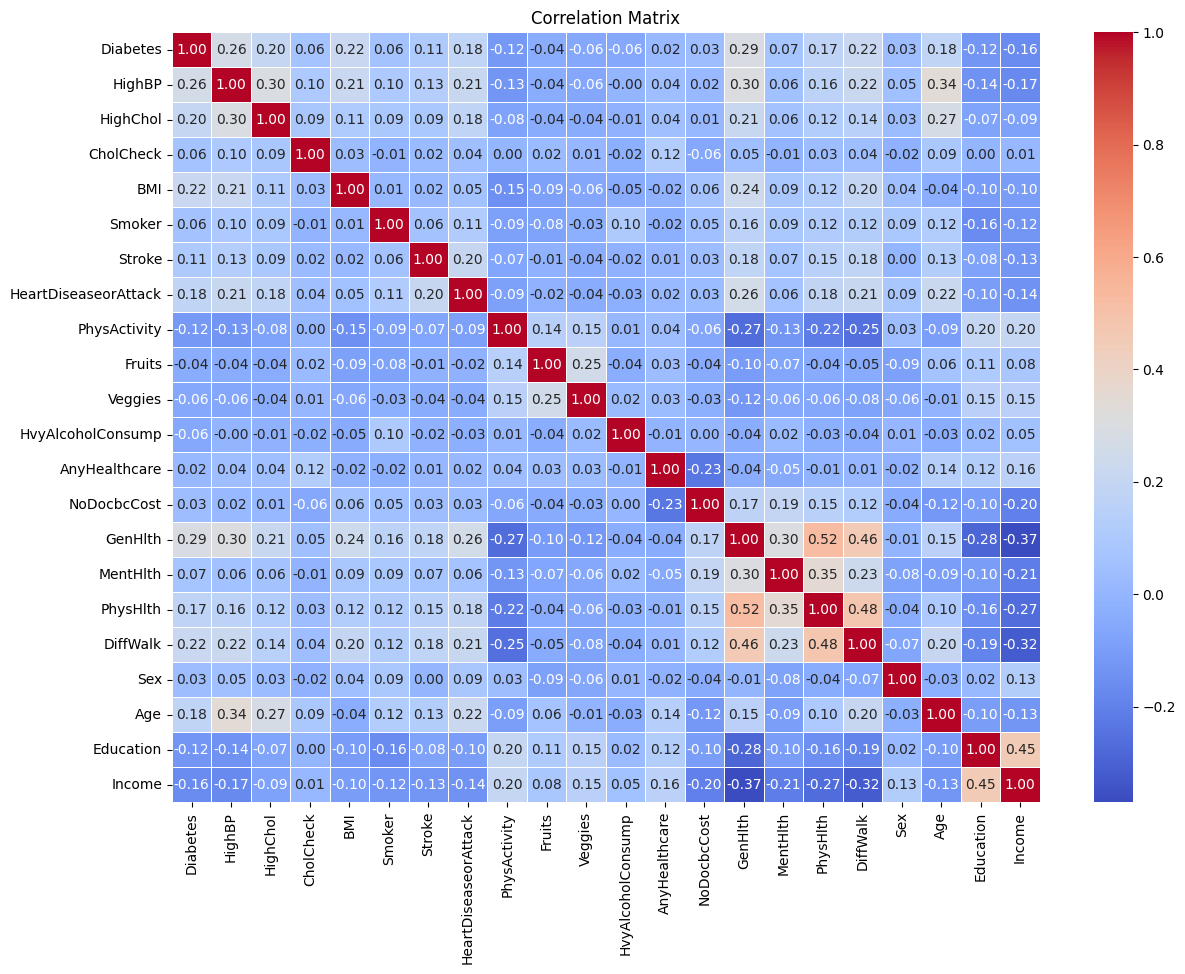

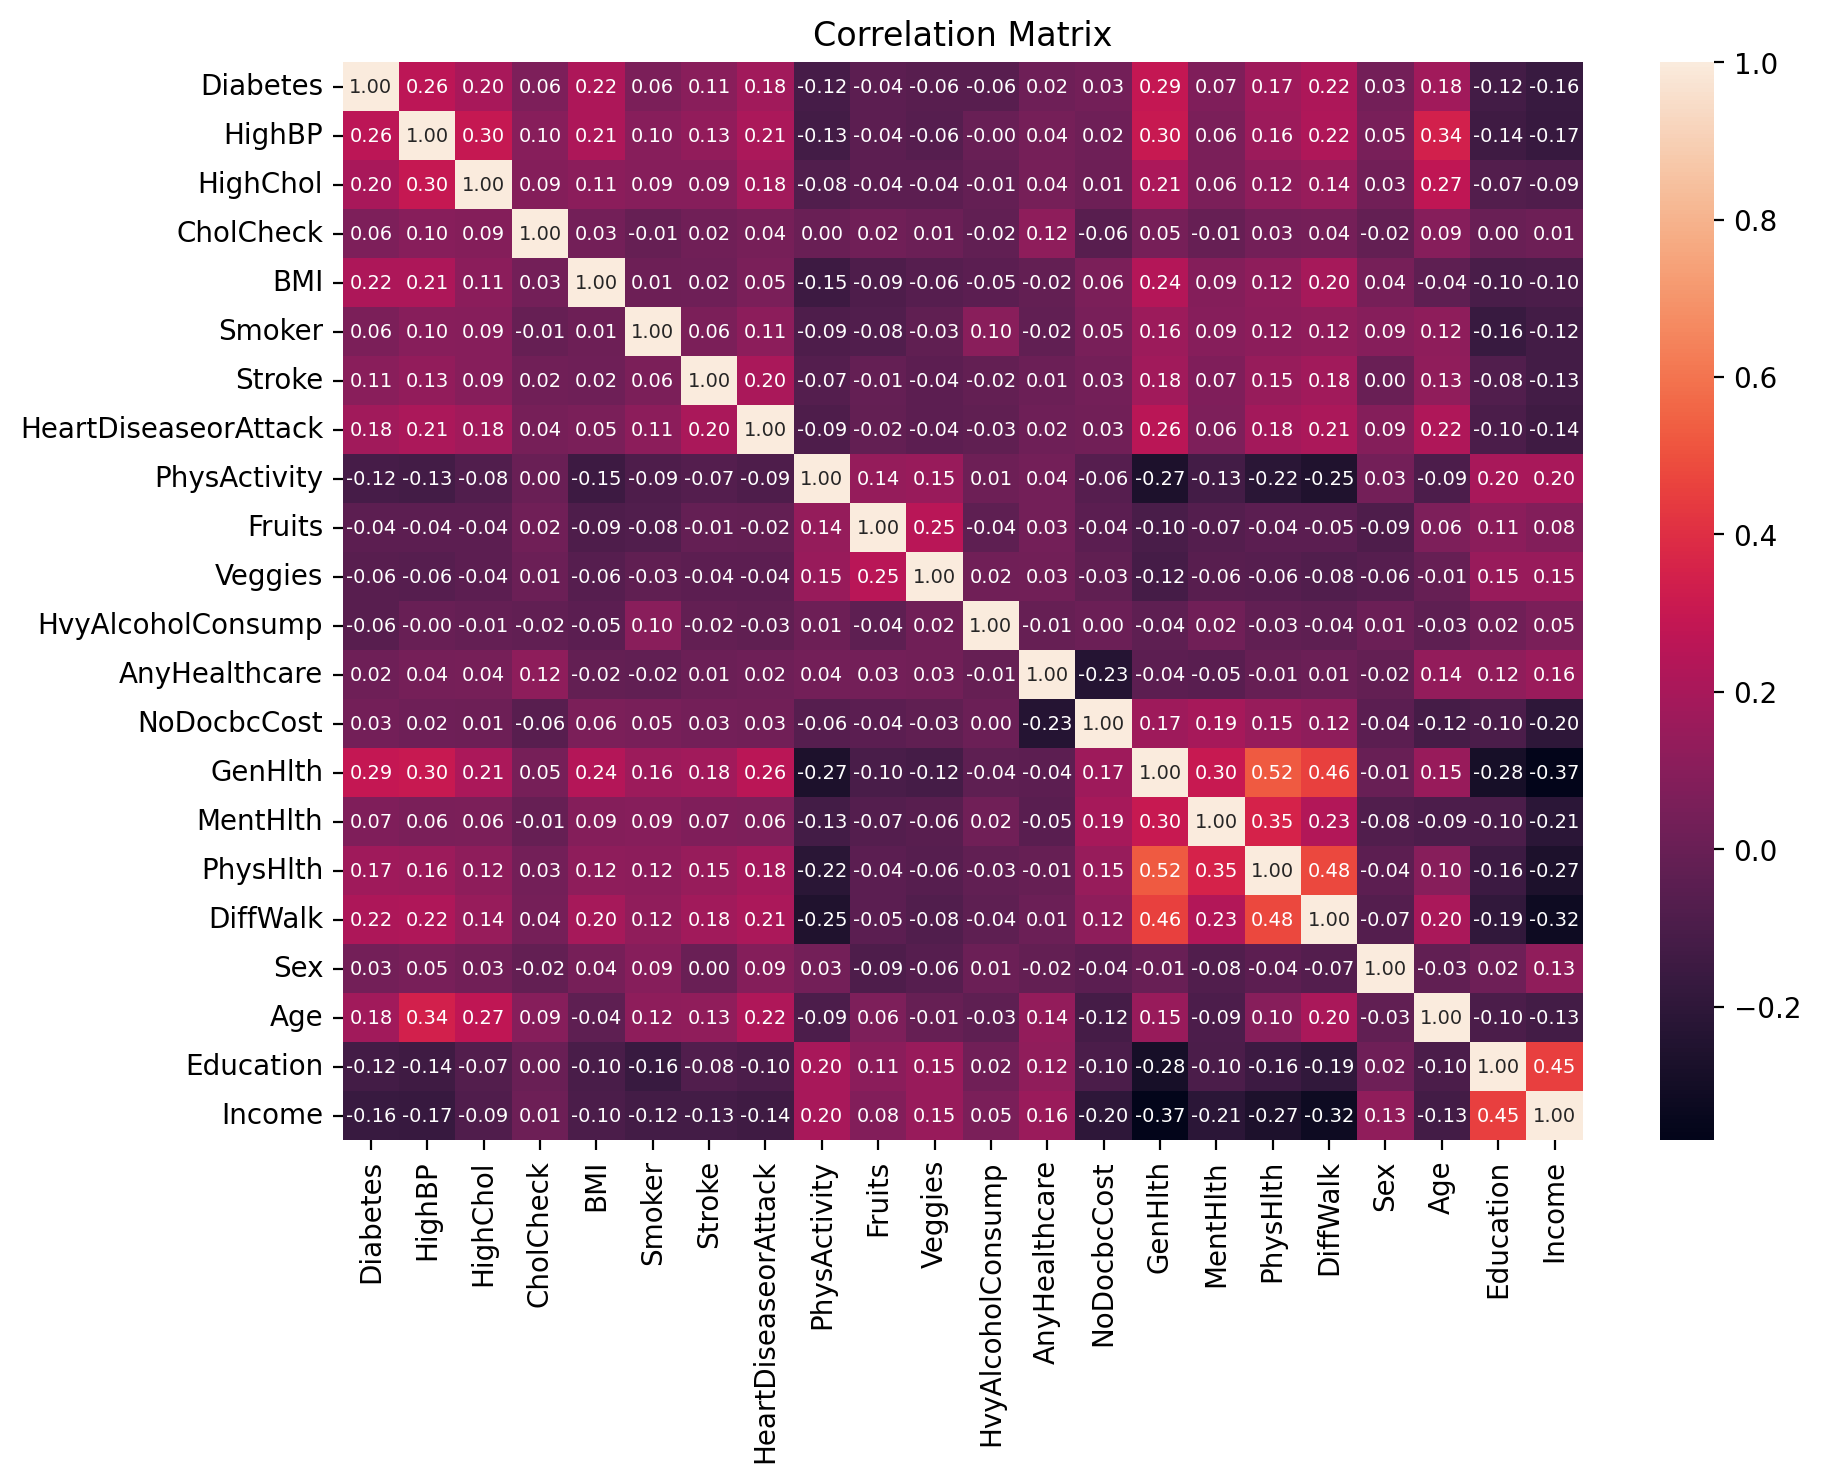

In [27]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.7, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# "тепловая карта" еще вариант
plt.figure(figsize=(10,7),dpi=200)
sns.heatmap(df.corr(),annot=True,annot_kws={"size" : 7},fmt=".2f");
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Создадим, обучим и оценим модель случайного леса для предсказания наличия диабета

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from prettytable import PrettyTable
from tabulate import tabulate

# Загрузим датасет
df = pd.read_csv('C:/Users/nickk/OneDrive/Desktop/TPU/ProgrammingPython/Kursach/diabetes_binary_health_indicators_BRFSS2015.csv')

# Подготовка данных для моделирования
X = df.drop('Diabetes', axis=1) # я переименовала столбец diabetes_binary 
y = df['Diabetes']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Прогнозы
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Печать результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8601781772311574
Confusion Matrix:
[[63634  1971]
 [ 8670  1829]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     65605
         1.0       0.48      0.17      0.26     10499

    accuracy                           0.86     76104
   macro avg       0.68      0.57      0.59     76104
weighted avg       0.83      0.86      0.83     76104



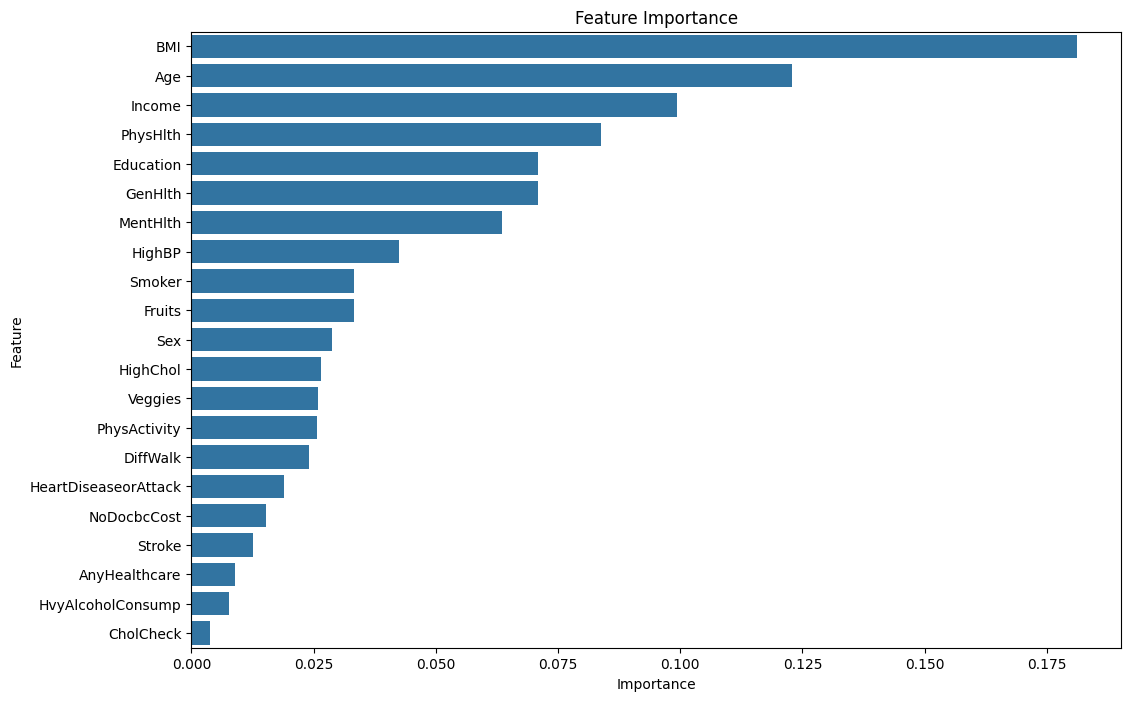

Accuracy: 0.8601781772311574
Confusion Matrix:
[[63634  1971]
 [ 8670  1829]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     65605
         1.0       0.48      0.17      0.26     10499

    accuracy                           0.86     76104
   macro avg       0.68      0.57      0.59     76104
weighted avg       0.83      0.86      0.83     76104


Top factors influencing diabetes prediction:
      Feature  Importance
3         BMI    0.181192
18        Age    0.122963
20     Income    0.099427
15   PhysHlth    0.083703
19  Education    0.070948


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Загрузим датасет
df = pd.read_csv('C:/Users/nickk/OneDrive/Desktop/TPU/ProgrammingPython/Kursach/diabetes_binary_health_indicators_BRFSS2015.csv', sep=",")

# Подготовка данных для моделирования
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Прогнозы
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Важность признаков
feature_importances = model.feature_importances_
features = X.columns

# Создание DataFrame для удобства
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Сортировка признаков по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'\nTop factors influencing diabetes prediction:\n{feature_importance_df.head()}')